### 문장 & 단어 예측
- 데이터셋
    * 문장의 단어를 N-gram 기반으로 구성해서 생성
        - 예) "오늘은 즐거운 피자 먹는 금요일 입니다."
        - '오늘은 즐거운', '오늘은 즐거운 피자', '오늘은 즐거운 피자 먹는',
        - '오늘은 즐거운 피자 먹는 금요일', '오늘은 즐거운 피자 먹는 금요일 입니다.'
    * N-gram 기반으로 생성된 데이터셋의 마지막 요소 ==> 레이블

- 정확한 텍스트 데이터 준비가 중요
    * 맞춤법, 띄어쓰기 잘 되어있는 데이터 준비

#### 데이터 준비

In [57]:
songData = '''Last Christmas I gave you my heart
But the very next day you gave it away
This year, to save me from tears
I'll give it to someone special
Last Christmas I gave you my heart
But the very next day you gave it away
This year, to save me from tears
I'll give it to someone special
Once bitten and twice shy
I keep my distance, but you still catch my eye
Tell me baby, do you recognize me?
Well, it's been a year, it doesn't surprise me
Happy Christmas, I wrapped it up and sent it
With a note saying "I love you", I meant it
Now I know what a fool I've been
But if you kissed me now, I know you'd fool me again
Last Christmas I gave you my heart
But the very next day you gave it away
This year, to save me from tears
I'll give it to someone special
Last Christmas I gave you my heart
But the very next day you gave it away
This year, to save me from tears
I'll give it to someone special'''

In [58]:
songDataList = songData.split('\n')

print(f'갯수 : {len(songDataList)}')

갯수 : 24


#### 텍스트 데이터 기반 단어 사전 생성
- Kearas Tokenizer() 사용 -> 구두점 삭제, 공백 기준으로 분할
- 단어 사전 생성

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### [1] tokenizer

In [60]:
tk = Tokenizer()
tk.fit_on_texts(songDataList)

In [61]:
tk.word_index

{'you': 1,
 'it': 2,
 'i': 3,
 'me': 4,
 'gave': 5,
 'to': 6,
 'my': 7,
 'but': 8,
 'christmas': 9,
 'year': 10,
 'last': 11,
 'heart': 12,
 'the': 13,
 'very': 14,
 'next': 15,
 'day': 16,
 'away': 17,
 'this': 18,
 'save': 19,
 'from': 20,
 'tears': 21,
 "i'll": 22,
 'give': 23,
 'someone': 24,
 'special': 25,
 'a': 26,
 'and': 27,
 'been': 28,
 'now': 29,
 'know': 30,
 'fool': 31,
 'once': 32,
 'bitten': 33,
 'twice': 34,
 'shy': 35,
 'keep': 36,
 'distance': 37,
 'still': 38,
 'catch': 39,
 'eye': 40,
 'tell': 41,
 'baby': 42,
 'do': 43,
 'recognize': 44,
 'well': 45,
 "it's": 46,
 "doesn't": 47,
 'surprise': 48,
 'happy': 49,
 'wrapped': 50,
 'up': 51,
 'sent': 52,
 'with': 53,
 'note': 54,
 'saying': 55,
 'love': 56,
 'meant': 57,
 'what': 58,
 "i've": 59,
 'if': 60,
 'kissed': 61,
 "you'd": 62,
 'again': 63}

In [62]:
# 문장 --> 숫자
seqData1 = tk.texts_to_sequences(songDataList)

In [63]:
# 숫자화된 데이터 --> N-gram 방식으로 새롭게 생성
seqData2 = []
for line in seqData1:
    print(line)
    for idx in range(2, len(line)+1):
        seqData2.append(line[:idx])

[11, 9, 3, 5, 1, 7, 12]
[8, 13, 14, 15, 16, 1, 5, 2, 17]
[18, 10, 6, 19, 4, 20, 21]
[22, 23, 2, 6, 24, 25]
[11, 9, 3, 5, 1, 7, 12]
[8, 13, 14, 15, 16, 1, 5, 2, 17]
[18, 10, 6, 19, 4, 20, 21]
[22, 23, 2, 6, 24, 25]
[32, 33, 27, 34, 35]
[3, 36, 7, 37, 8, 1, 38, 39, 7, 40]
[41, 4, 42, 43, 1, 44, 4]
[45, 46, 28, 26, 10, 2, 47, 48, 4]
[49, 9, 3, 50, 2, 51, 27, 52, 2]
[53, 26, 54, 55, 3, 56, 1, 3, 57, 2]
[29, 3, 30, 58, 26, 31, 59, 28]
[8, 60, 1, 61, 4, 29, 3, 30, 62, 31, 4, 63]
[11, 9, 3, 5, 1, 7, 12]
[8, 13, 14, 15, 16, 1, 5, 2, 17]
[18, 10, 6, 19, 4, 20, 21]
[22, 23, 2, 6, 24, 25]
[11, 9, 3, 5, 1, 7, 12]
[8, 13, 14, 15, 16, 1, 5, 2, 17]
[18, 10, 6, 19, 4, 20, 21]
[22, 23, 2, 6, 24, 25]


In [64]:
print(seqData2)

[[11, 9], [11, 9, 3], [11, 9, 3, 5], [11, 9, 3, 5, 1], [11, 9, 3, 5, 1, 7], [11, 9, 3, 5, 1, 7, 12], [8, 13], [8, 13, 14], [8, 13, 14, 15], [8, 13, 14, 15, 16], [8, 13, 14, 15, 16, 1], [8, 13, 14, 15, 16, 1, 5], [8, 13, 14, 15, 16, 1, 5, 2], [8, 13, 14, 15, 16, 1, 5, 2, 17], [18, 10], [18, 10, 6], [18, 10, 6, 19], [18, 10, 6, 19, 4], [18, 10, 6, 19, 4, 20], [18, 10, 6, 19, 4, 20, 21], [22, 23], [22, 23, 2], [22, 23, 2, 6], [22, 23, 2, 6, 24], [22, 23, 2, 6, 24, 25], [11, 9], [11, 9, 3], [11, 9, 3, 5], [11, 9, 3, 5, 1], [11, 9, 3, 5, 1, 7], [11, 9, 3, 5, 1, 7, 12], [8, 13], [8, 13, 14], [8, 13, 14, 15], [8, 13, 14, 15, 16], [8, 13, 14, 15, 16, 1], [8, 13, 14, 15, 16, 1, 5], [8, 13, 14, 15, 16, 1, 5, 2], [8, 13, 14, 15, 16, 1, 5, 2, 17], [18, 10], [18, 10, 6], [18, 10, 6, 19], [18, 10, 6, 19, 4], [18, 10, 6, 19, 4, 20], [18, 10, 6, 19, 4, 20, 21], [22, 23], [22, 23, 2], [22, 23, 2, 6], [22, 23, 2, 6, 24], [22, 23, 2, 6, 24, 25], [32, 33], [32, 33, 27], [32, 33, 27, 34], [32, 33, 27, 34, 

In [65]:
print(len(seqData2))

162


In [66]:
seqData2

[[11, 9],
 [11, 9, 3],
 [11, 9, 3, 5],
 [11, 9, 3, 5, 1],
 [11, 9, 3, 5, 1, 7],
 [11, 9, 3, 5, 1, 7, 12],
 [8, 13],
 [8, 13, 14],
 [8, 13, 14, 15],
 [8, 13, 14, 15, 16],
 [8, 13, 14, 15, 16, 1],
 [8, 13, 14, 15, 16, 1, 5],
 [8, 13, 14, 15, 16, 1, 5, 2],
 [8, 13, 14, 15, 16, 1, 5, 2, 17],
 [18, 10],
 [18, 10, 6],
 [18, 10, 6, 19],
 [18, 10, 6, 19, 4],
 [18, 10, 6, 19, 4, 20],
 [18, 10, 6, 19, 4, 20, 21],
 [22, 23],
 [22, 23, 2],
 [22, 23, 2, 6],
 [22, 23, 2, 6, 24],
 [22, 23, 2, 6, 24, 25],
 [11, 9],
 [11, 9, 3],
 [11, 9, 3, 5],
 [11, 9, 3, 5, 1],
 [11, 9, 3, 5, 1, 7],
 [11, 9, 3, 5, 1, 7, 12],
 [8, 13],
 [8, 13, 14],
 [8, 13, 14, 15],
 [8, 13, 14, 15, 16],
 [8, 13, 14, 15, 16, 1],
 [8, 13, 14, 15, 16, 1, 5],
 [8, 13, 14, 15, 16, 1, 5, 2],
 [8, 13, 14, 15, 16, 1, 5, 2, 17],
 [18, 10],
 [18, 10, 6],
 [18, 10, 6, 19],
 [18, 10, 6, 19, 4],
 [18, 10, 6, 19, 4, 20],
 [18, 10, 6, 19, 4, 20, 21],
 [22, 23],
 [22, 23, 2],
 [22, 23, 2, 6],
 [22, 23, 2, 6, 24],
 [22, 23, 2, 6, 24, 25],
 [32, 33],

In [67]:
MAX_LENGTH = max([len(_) for _ in seqData2])

In [68]:
# Padding => 앞부분을 0으로 채우기 (기본값)
songData3 = pad_sequences(seqData2, maxlen=MAX_LENGTH)

In [69]:
songData3.shape, type(songData3)

((162, 12), numpy.ndarray)

##### [2] 학습용 데이터 준비

[2-1] 데이터와 라벨 분리

In [70]:
data, label = songData3[:, :-1], songData3[:, -1]

In [71]:
data.shape, label.shape

((162, 11), (162,))

[2-2] 라벨 인코딩

In [72]:
VOCA_NUM = len(tk.word_index)+1
VOCA_NUM

64

In [73]:
from tensorflow.keras.utils import to_categorical

In [74]:
label_oh = to_categorical(label, num_classes=VOCA_NUM)

In [75]:
label_oh[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

##### [3] 모델 만들기

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [77]:
model = Sequential()

model.add(Embedding(VOCA_NUM, 8))
model.add(Bidirectional(LSTM(MAX_LENGTH-1)))
model.add(Dense(VOCA_NUM, activation = 'softmax'))

In [78]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
stopES = EarlyStopping(monitor='val_acc',
                       patience=5)

In [81]:
history = model.fit(data, label_oh,
                    epochs=1500,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/1500
5/5 [==============================] - 3s 135ms/step - loss: 4.1566 - acc: 0.0310 - val_loss: 4.1503 - val_acc: 0.0606
Epoch 2/1500
5/5 [==============================] - 0s 9ms/step - loss: 4.1494 - acc: 0.0543 - val_loss: 4.1424 - val_acc: 0.0606
Epoch 3/1500
5/5 [==============================] - 0s 8ms/step - loss: 4.1432 - acc: 0.0543 - val_loss: 4.1341 - val_acc: 0.0606
Epoch 4/1500
5/5 [==============================] - 0s 8ms/step - loss: 4.1368 - acc: 0.0543 - val_loss: 4.1263 - val_acc: 0.0606
Epoch 5/1500
5/5 [==============================] - 0s 8ms/step - loss: 4.1302 - acc: 0.0620 - val_loss: 4.1181 - val_acc: 0.0606
Epoch 6/1500
5/5 [==============================] - 0s 10ms/step - loss: 4.1230 - acc: 0.0853 - val_loss: 4.1079 - val_acc: 0.0303
Epoch 7/1500
5/5 [==============================] - 0s 10ms/step - loss: 4.1147 - acc: 0.0620 - val_loss: 4.0978 - val_acc: 0.0303
Epoch 8/1500
5/5 [==============================] - 0s 10ms/step - loss: 4.1061 - acc:

In [82]:
import matplotlib.pyplot as plt

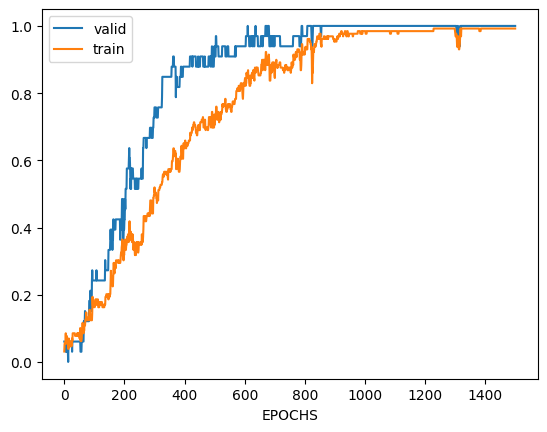

In [83]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.xlabel('EPOCHS')
plt.legend(['valid', 'train'])
plt.show()

##### [4] 텍스트 생성하기

In [84]:
seed_text = 'last christmas i gave'

In [85]:
# tokenizer
token_list = tk.texts_to_sequences([seed_text])[0]

In [86]:
# 훈련 데이터와 동일한 크기로 만들기 (패딩)
token_list = pad_sequences([token_list], maxlen=MAX_LENGTH-1, padding='pre')

In [87]:
token_list

array([[ 0,  0,  0,  0,  0,  0,  0, 11,  9,  3,  5]])

In [88]:
#다음 단어 예측하기
import numpy as np

predicted = np.argmax(model.predict(token_list), axis=-1)
predicted

1/1 [==============================] - 1s 632ms/step


array([1], dtype=int64)

In [93]:
for word, index in tk.word_index.items():
    if index == predicted:
        print(word)
        break

you
